## Association Rules

## Import required packages

## Installation 

    conda install matplotlib
or

    pip install matplotlib


**No Need for COLAB**

In [27]:
# pip install mlxtend

In [28]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Example 1: Phone Cases

In [29]:
# Load and preprocess data set 
df = pd.read_csv('/content/sample_data/Faceplate.csv')
df.set_index('Transaction', inplace=True)
df

,Red,White,Blue,Orange,Green,Yellow
Transaction,,,,,,
1,1,1,0,0,1,0
2,0,1,0,1,0,0
3,0,1,1,0,0,0
4,1,1,0,1,0,0
5,1,0,1,0,0,0
6,0,1,1,0,0,0
7,1,0,1,0,0,0
8,1,1,1,0,1,0
9,1,1,1,0,0,0


In [30]:
# first create frequent itemsets where min support =0.2 or 20%
itemsets = apriori(df, min_support=0.2, use_colnames=True)

# and convert into rules with min confidence = 50%
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False).head(10)

# you can drop unnecessary columns
# print(rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(6))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,"(Red, White)",(Green),0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
15,(Green),"(Red, White)",0.2,0.4,0.2,1.000000,2.500000,0.12,inf
4,(Green),(Red),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
14,"(Green, White)",(Red),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
7,(Orange),(White),0.2,0.7,0.2,1.000000,1.428571,0.06,inf
8,(Green),(White),0.2,0.7,0.2,1.000000,1.428571,0.06,inf
12,"(Red, Green)",(White),0.2,0.7,0.2,1.000000,1.428571,0.06,inf
2,(Blue),(Red),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Red),(Blue),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
0,(Red),(White),0.6,0.7,0.4,0.666667,0.952381,-0.02,0.9


In [31]:
# filter to get rules with single consequents only
rules[[len(c) == 1 for c in rules.consequents]].sort_values(by=['lift'], ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,"(Red, White)",(Green),0.4,0.2,0.2,0.5,2.500000,0.12,1.6
4,(Green),(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf
14,"(Green, White)",(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf
7,(Orange),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf
8,(Green),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf


### Example 2: From list to binary one hot encoding- Generating Frequent Itemsets

#### The apriori function expects data in a one-hot encoded pandas DataFrame. Suppose we have the following transaction data:

In [32]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [33]:
print(*dataset, sep='\n')

['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt']
['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt']
['Milk', 'Apple', 'Kidney Beans', 'Eggs']
['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt']
['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']


#### We can transform it into the right format via the TransactionEncoder as follows:

In [34]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder


# OneHotEncoding variables
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [35]:
# Return the items and itemsets with at least 60% support:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.6)      # (n) is the number of the item: eg, (3) = Eggs

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


By default, apriori returns the column indices of the items, which may be useful in downstream operations such as association rule mining. For better readability, we can set use_colnames=True to convert these integer values into the respective item names: 

In [36]:
apriori(df, min_support=0.6, use_colnames=True)      #Setting use_colnames as True returns variable names instead of index

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


### Selecting and Filtering Results

The advantage of working with pandas DataFrames is that we can use its convenient features to filter the results. For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via apriori and add a new column that stores the length of each itemset:

In [37]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Onion, Eggs)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [38]:
# Then, we can select the results that satisfy our desired criteria as follows:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.8) ]

,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


In [39]:
# Similarly we can select entries based on the "itemsets" column:

frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]


,support,itemsets,length
6,0.6,"(Onion, Eggs)",2


### Working with Sparse Representations

To save memory, you may want to represent your transaction data in the sparse format. This is especially useful if you have lots of products and small transactions.

In [40]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
oht_ary = te.fit(dataset).transform(dataset, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,0,0,0,1,0,True,1,1,1,0,1
1,0,0,1,1,0,True,0,1,1,0,1
2,1,0,0,1,0,True,1,0,0,0,0
3,0,1,0,0,0,True,1,0,0,1,1
4,0,1,0,1,1,True,0,0,1,0,0


### Example 3: Charles Book Club

In [41]:
# load dataset
all_books_df = pd.read_csv('/content/sample_data/CharlesBookClub.csv')

# Droping useless columns
# creating the binary incidence matrix
ignore = ['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase',
          'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence']
count_books = all_books_df.drop(columns=ignore)
count_books[count_books > 0] = 1

count_books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


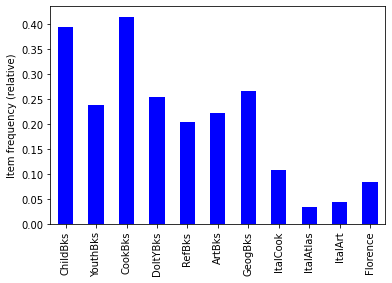

In [42]:
# determine item frequencies
itemFrequency = count_books.sum(axis=0) / len(count_books)

# plot histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [43]:
# create frequent itemsets and rules
itemsets = apriori(count_books, min_support=200/4000, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)

print('Number of rules', len(rules))

# Display 25 rules with highest lift
rules.sort_values(by=['lift'], ascending=False).head(10)

pd.set_option('precision', 5)
pd.set_option('display.width', 100)
print(rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25))
pd.set_option('precision', 6)

Number of rules 81
                      antecedents          consequents  ...     lift  leverage
64             (RefBks, YouthBks)  (CookBks, ChildBks)  ...  2.80992   0.03559
73             (RefBks, DoItYBks)  (CookBks, ChildBks)  ...  2.73621   0.03886
60           (YouthBks, DoItYBks)  (CookBks, ChildBks)  ...  2.68145   0.04201
80              (RefBks, GeogBks)  (CookBks, ChildBks)  ...  2.54000   0.03047
69            (YouthBks, GeogBks)  (CookBks, ChildBks)  ...  2.50109   0.03796
77            (DoItYBks, GeogBks)  (CookBks, ChildBks)  ...  2.47525   0.03606
67   (CookBks, ChildBks, GeogBks)           (YouthBks)  ...  2.42445   0.03716
72    (RefBks, CookBks, ChildBks)           (DoItYBks)  ...  2.32301   0.03488
48            (DoItYBks, GeogBks)           (YouthBks)  ...  2.26486   0.03044
63    (RefBks, CookBks, ChildBks)           (YouthBks)  ...  2.24057   0.03059
59  (DoItYBks, CookBks, ChildBks)           (YouthBks)  ...  2.20131   0.03656
56  (YouthBks, CookBks, ChildBks)

In [44]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules = rules[[len(c) <= 2 for c in rules.antecedents]]
rules = rules[[len(c) == 1 for c in rules.consequents]]

rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,"(DoItYBks, GeogBks)",(YouthBks),0.10100,0.23825,0.05450,0.539604,2.264864,0.030437,1.654554
34,"(RefBks, ChildBks)",(DoItYBks),0.12825,0.25475,0.07100,0.553606,2.173135,0.038328,1.669490
20,"(ChildBks, GeogBks)",(YouthBks),0.14625,0.23825,0.07550,0.516239,2.166797,0.040656,1.574642
46,"(CookBks, GeogBks)",(YouthBks),0.15625,0.23825,0.08025,0.513600,2.155719,0.043023,1.566098
16,"(YouthBks, ChildBks)",(DoItYBks),0.14750,0.25475,0.08025,0.544068,2.135693,0.042674,1.634563
50,"(RefBks, CookBks)",(DoItYBks),0.13975,0.25475,0.07450,0.533095,2.092619,0.038899,1.596148
24,"(CookBks, ChildBks)",(DoItYBks),0.24200,0.25475,0.12775,0.527893,2.072198,0.066101,1.578560
47,"(YouthBks, GeogBks)",(DoItYBks),0.10450,0.25475,0.05450,0.521531,2.047227,0.027879,1.557573
41,"(YouthBks, CookBks)",(DoItYBks),0.16100,0.25475,0.08375,0.520186,2.041948,0.042735,1.553207
43,"(RefBks, YouthBks)",(CookBks),0.08125,0.41550,0.06825,0.840000,2.021661,0.034491,3.653125
